In [22]:
import numpy as np
import torch
import torch.nn.functional as F
from matplotlib import pyplot as plt

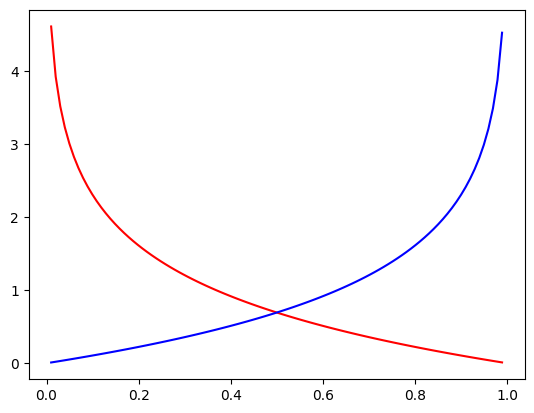

In [23]:
x = np.linspace(0.01, .999, 100, endpoint=False)
y_1 = -np.log(x)
y_0 = -np.log(1 - x)
plt.plot(x, y_1, color='red')
plt.plot(x, y_0, color='blue')

In [24]:
torch.manual_seed(1)
CLASSES_SIZE = 5

x = torch.rand(CLASSES_SIZE, dtype=float)
print("x =", x.shape, x, x.sum())

z = F.softmax(x, dim=0)
print("z =", z.shape, z, z.sum())

y = torch.randint(0, 2, (CLASSES_SIZE,))
print("y =", y.shape, y)

# Case 1
try:
    print("cross_entropy_loss   =", F.cross_entropy(x, y.float()))  # tensor(2.1438)
except Exception as e:
    print(f"ERROR cross_entropy_loss :", e)

# Case 2
try:
    print("nll_loss             =", F.nll_loss(z + 1e-8, y))  # tensor(2.1438)
except Exception as e:
    print(f"ERROR nll_loss :", e)

# Case 3
try:
    loss = (-(y * torch.log(z) + (1 - y) * torch.log(1 - z)))
    print("loss                 =", loss.sum(), loss)
except Exception as e:
    print(f"ERROR loss :", e)

# Case 4
try:
    cost = (-(y * torch.log(z)))
    print("cost                 =", cost.sum(), cost)
except Exception as e:
    print(f"ERROR cost :", e)

x = torch.Size([5]) tensor([0.0611, 0.2246, 0.2343, 0.1771, 0.5561], dtype=torch.float64) tensor(1.2530, dtype=torch.float64)
z = torch.Size([5]) tensor([0.1631, 0.1921, 0.1940, 0.1832, 0.2676], dtype=torch.float64) tensor(1.0000, dtype=torch.float64)
y = torch.Size([5]) tensor([0, 1, 0, 1, 1])
cross_entropy_loss   = tensor(4.6652, dtype=torch.float64)
nll_loss             = tensor(-0.1631, dtype=torch.float64)
loss                 = tensor(5.0589, dtype=torch.float64) tensor([0.1781, 1.6497, 0.2156, 1.6972, 1.3182], dtype=torch.float64)
cost                 = tensor(4.6652, dtype=torch.float64) tensor([0.0000, 1.6497, 0.0000, 1.6972, 1.3182], dtype=torch.float64)


## 뭐가 뭔지 아직 잘 모르겠다!!!